In [18]:
%reload_ext autoreload
%autoreload 2
%pylab inline --no-import-all

from pprint import pprint as pp
import numpy as np
import pandas as pd
import tensorflow as tf
import circle
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("deep")

Populating the interactive namespace from numpy and matplotlib


## Classification using MLP with distance  -4, radius   10, and width   6

---

### p.151 Figure 4.12


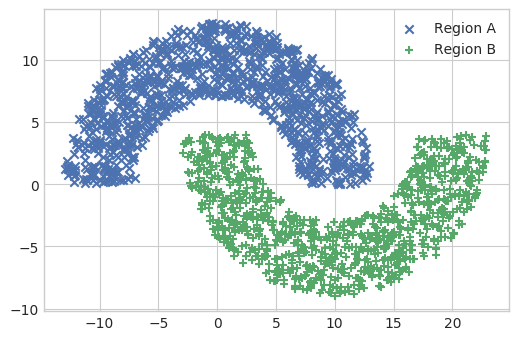

In [19]:
regionA, regionB = circle.gen_circles(10, 6, -4, 1000)
# plt.axis('equal')
plt.scatter(*regionA, marker='x', label='Region A')
plt.scatter(*regionB, marker='+', label='Region B')
plt.legend()
plt.show()

## Network Configuration

---

- 入力層 $m_0 = 2 $
- 中間層
    - $ m_1 = 20 $
- 出力層 $ m_2 = 1 $
- 活性化関数 hyperbolic tangent defined as
$$ \phi (v) = \frac{1 - exp(-2v)}{1 + exp(-2v}$$
- Threshold setting: zero
- Learning-rate parameter  : annealed linearly from 10-1 down to 10-5

2000


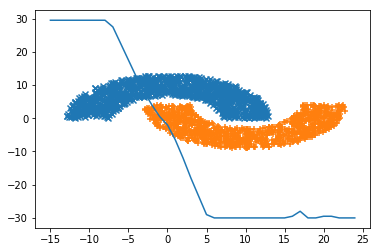

2000


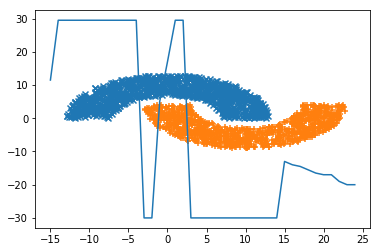

2000


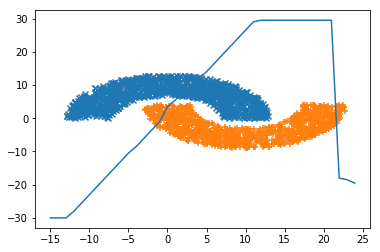

2000


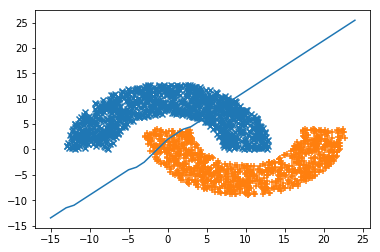

2000


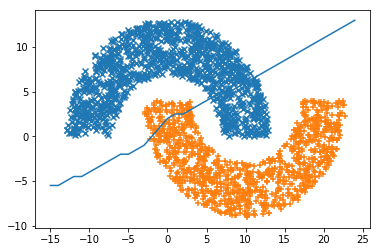

2000


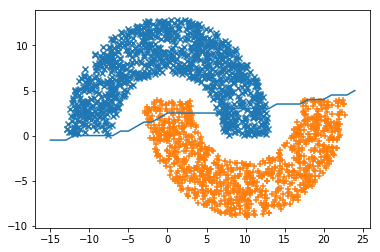

2000


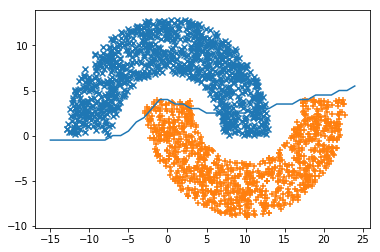

2000


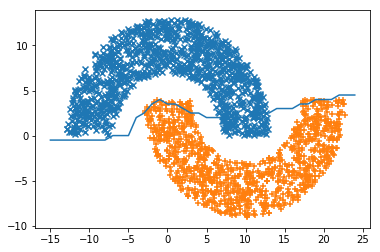

2000


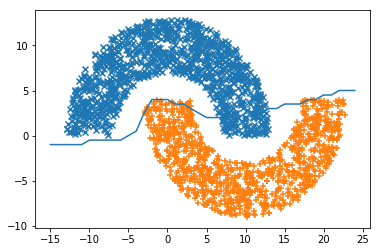

2000


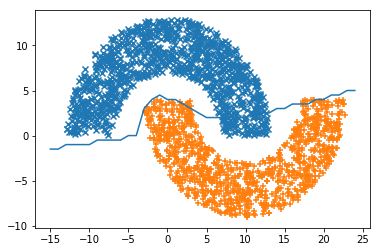

2000


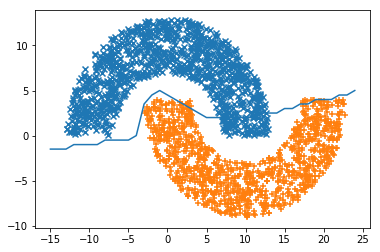

2000


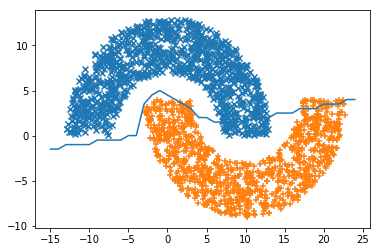

2000


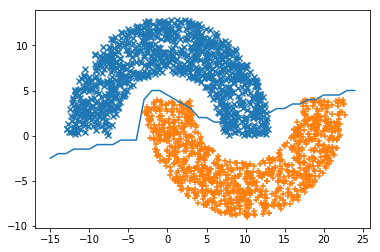

2000


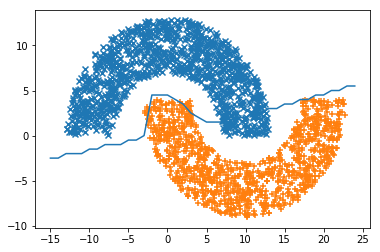

2000


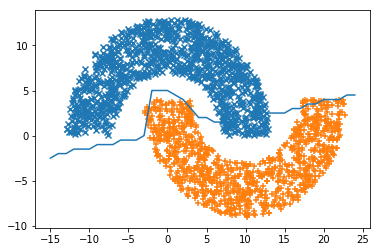

2000


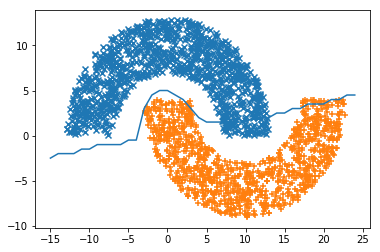

2000


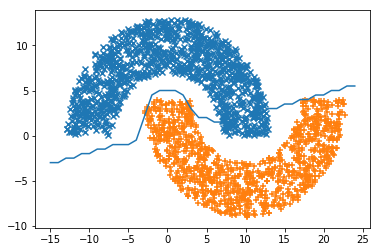

2000


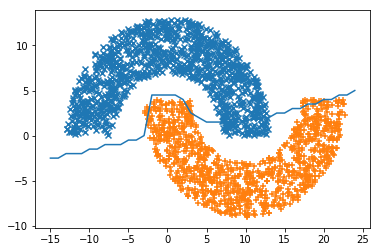

2000


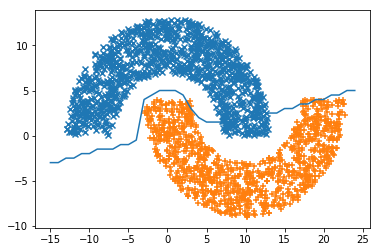

2000


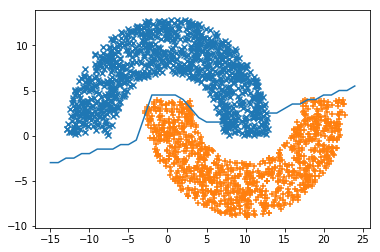

2000


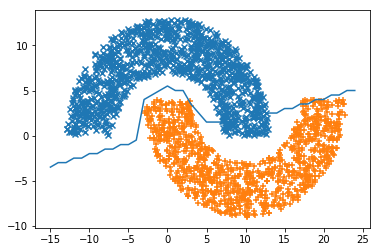

2000


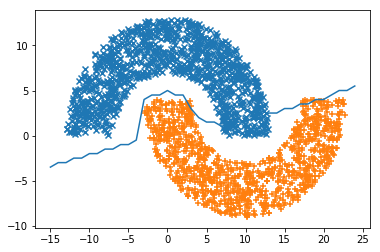

2000


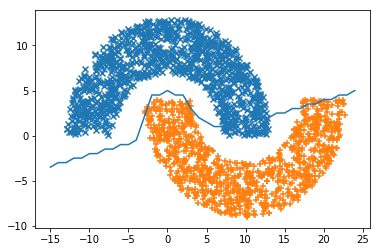

2000


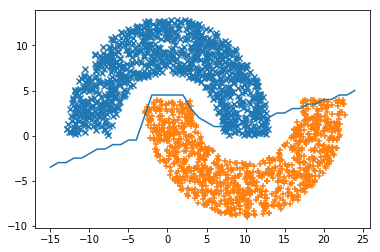

2000


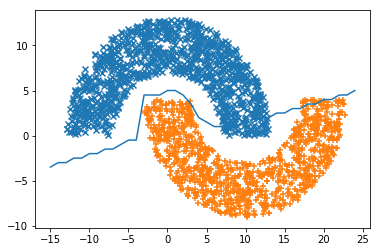

2000


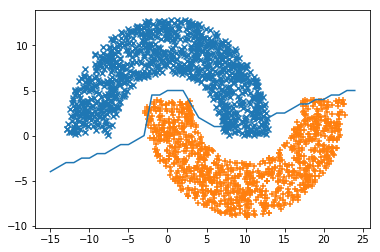

2000


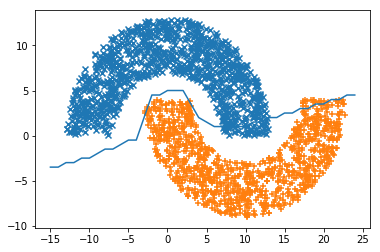

2000


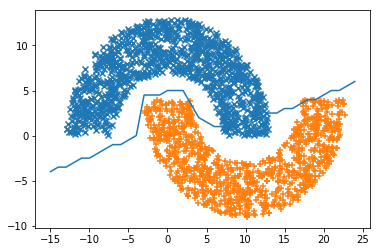

2000


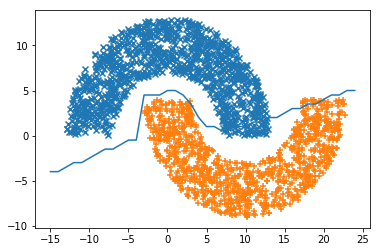

2000


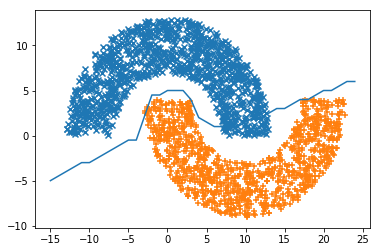

2000


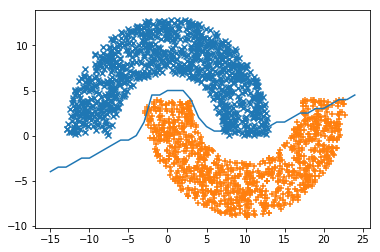

2000


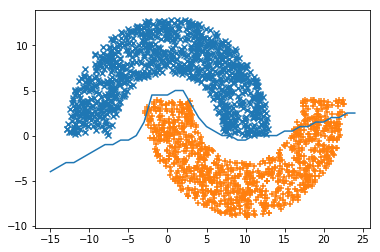

2000


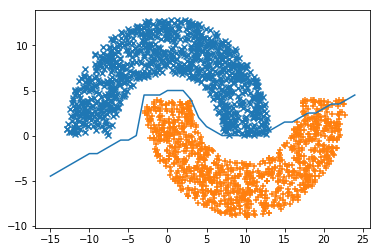

2000


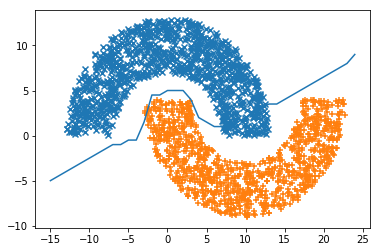

2000


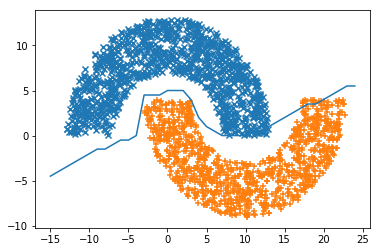

2000


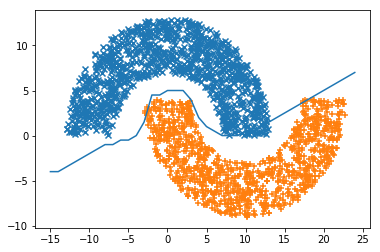

2000


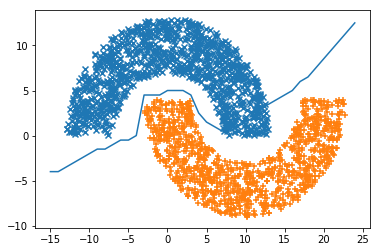

2000


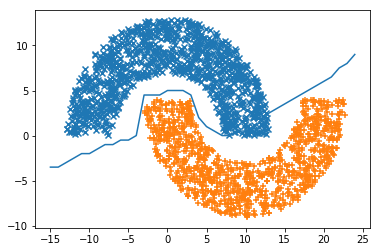

2000


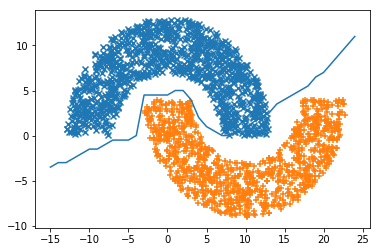

2000


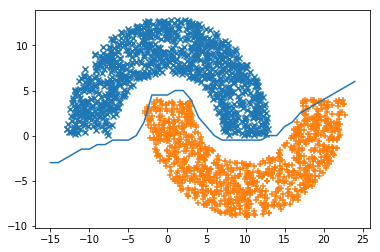

2000


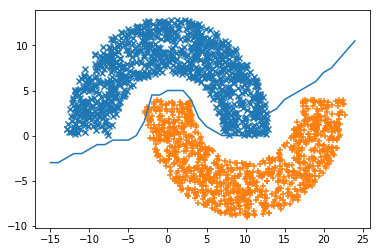

2000


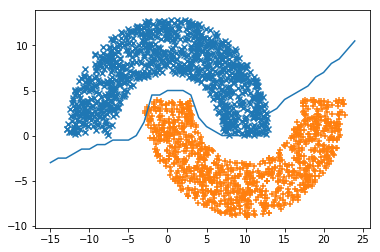

2000


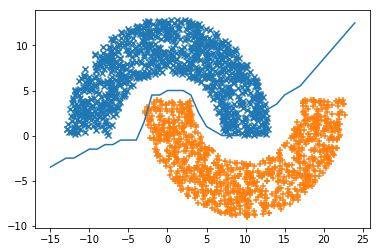

2000


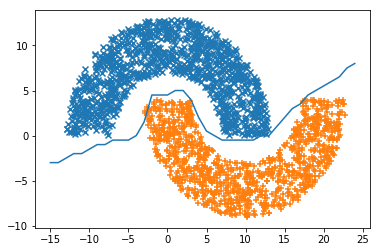

2000


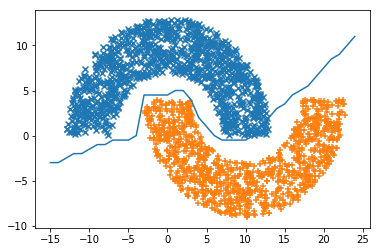

2000


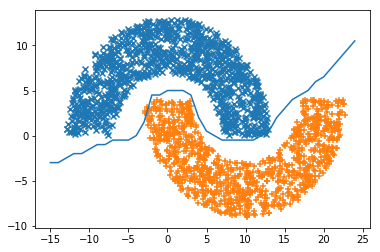

2000


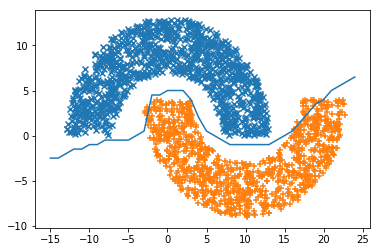

2000


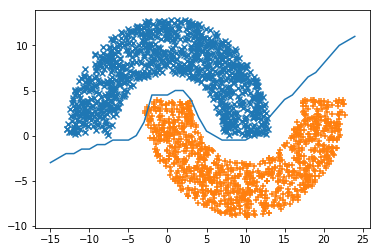

2000


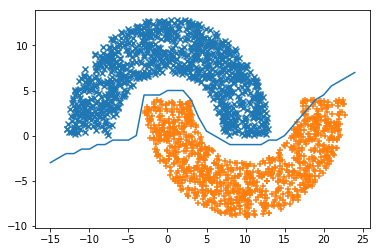

2000


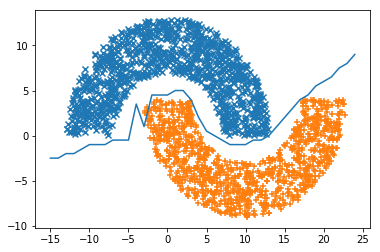

2000


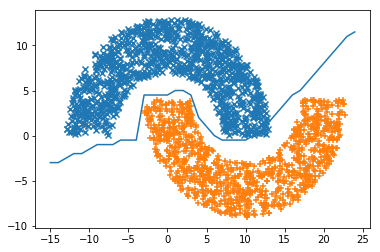

2000


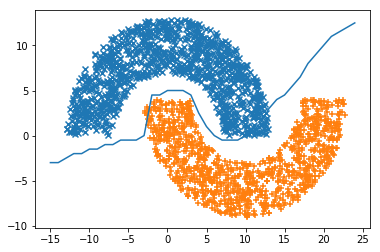

2000


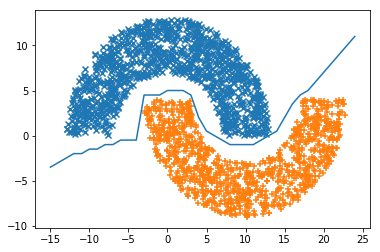

2000


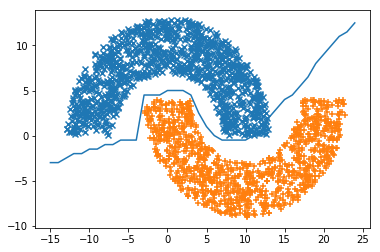

2000


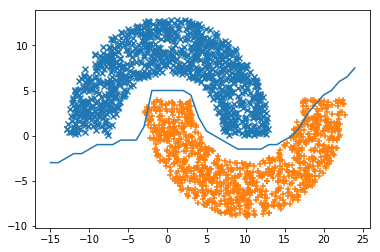

2000


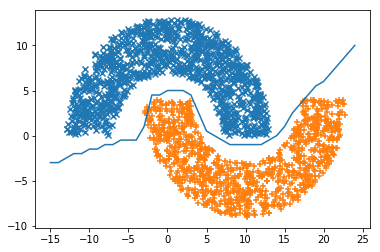

2000


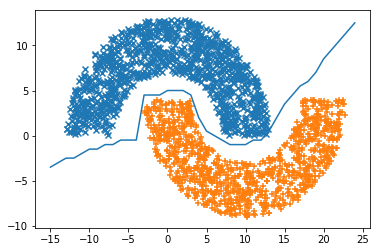

2000


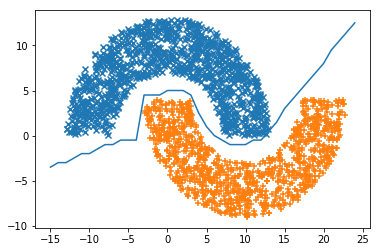

2000


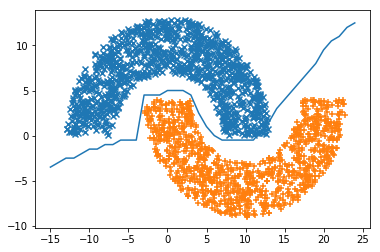

2000


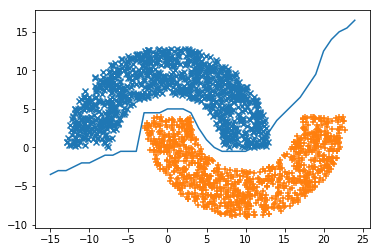

2000


KeyboardInterrupt: 

In [3]:
with tf.name_scope('test') as scope:
    # Placeholder
    input_layer = tf.placeholder(tf.float32, [None, 2], name='input')
    label_layer = tf.placeholder(tf.float32, [None, 1], name='label')

    # Free Parameter
    w1 = tf.Variable(tf.random_uniform([2, 20]))
    b1 = tf.Variable(tf.random_uniform([20]))
    tf.summary.histogram('w1', w1)

    w2 = tf.Variable(tf.random_uniform([20, 1]))
    b2 = tf.Variable(tf.random_uniform([1]))

    # network construction
    hidden_layer_1_v = tf.matmul(input_layer, w1) + b1
    hidden_layer_1_y = tf.tanh(hidden_layer_1_v)

    output_layer_v = tf.matmul(hidden_layer_1_y, w2) + b2
    output_layer_y = tf.tanh(output_layer_v)

    # define loss function
    loss = tf.losses.mean_squared_error(label_layer, output_layer_y)
    train_step = tf.train.GradientDescentOptimizer(1e-3).minimize(loss)
    
    summary = tf.summary.merge_all()

    def make_decision_line(sess, input_layer, output_layer):
        xs = np.arange(-15, 25, 1)
        ys = np.arange(-30, 30, 0.5)
        ys_res = []
        for x in xs:
            output_values = []
            for y in ys:
                output_value = sess.run([output_layer], feed_dict={
                        input_layer : [[x,y]],
                    })
                output_values.append(abs(output_value[0][0]))
            index = np.argmin(output_values)
            ys_res.append(ys[index])
        return xs, ys_res

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        writer = tf.summary.FileWriter('./test', sess.graph)
        for i in range(100):
            epoch = circle.make_a_epoch(regionA, regionB)
            print(len(epoch))
            for iter_i_in_epoch, (datum, label) in enumerate(epoch):
                loss_value, _, w_summary = sess.run([
                    loss,
                    train_step,
                    summary,
                ], feed_dict={
                    input_layer : [datum],
                    label_layer : [[label]],
                })
                writer.add_summary(w_summary, iter_i_in_epoch)
       # if iter_i_in_epoch % 10 == 0:
            xs, ys = make_decision_line(sess, input_layer, output_layer_y)
            plt.scatter(*regionA, marker='x', label='Region A')
            plt.scatter(*regionB, marker='+', label='Region B')
            plt.plot(xs, ys)
            plt.show()
            